In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi']=150
plt.rcParams['figure.figsize']=(10,5)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/NewspaperData.csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
df.tail()

,Newspaper,daily,sunday
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
31,St. Paul Pioneer Press,201.860,267.781
32,Tampa Tribune,321.626,408.343
33,Washington Post,838.902,1165.567


In [ ]:
df.drop(columns=['Newspaper'])

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [ ]:
df=df[['daily','sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


<Axes: xlabel='daily', ylabel='sunday'>

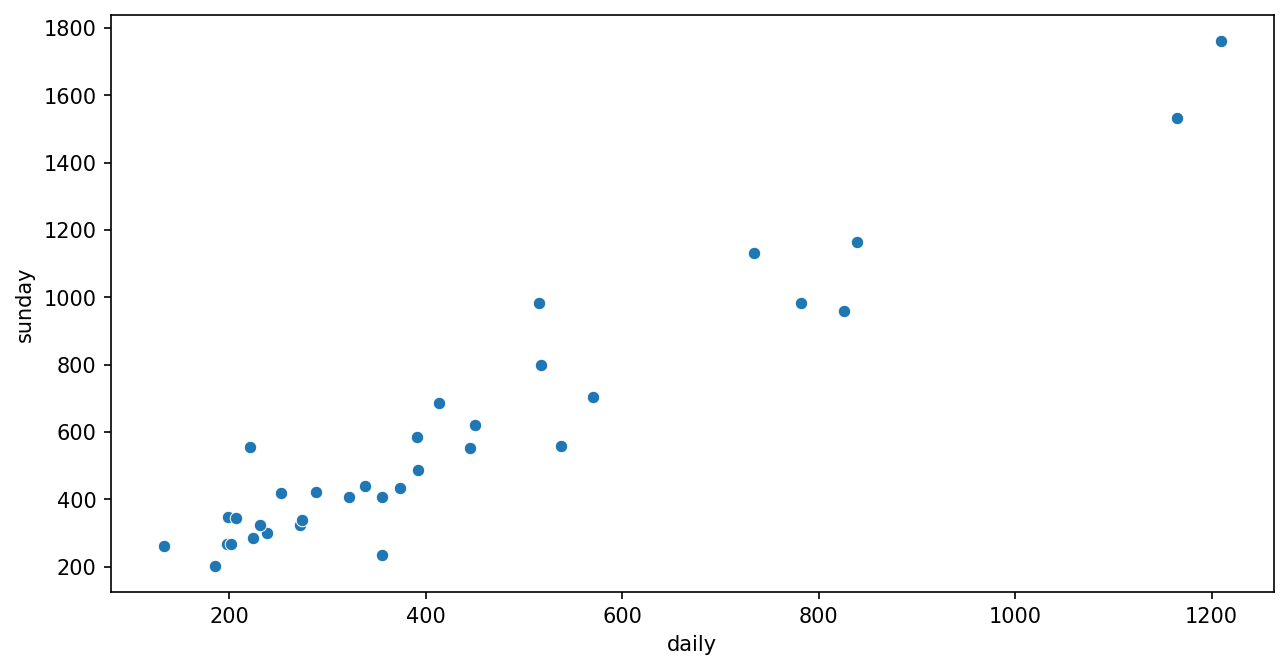

In [ ]:
sns.scatterplot(x=df['daily'],y=df['sunday'])

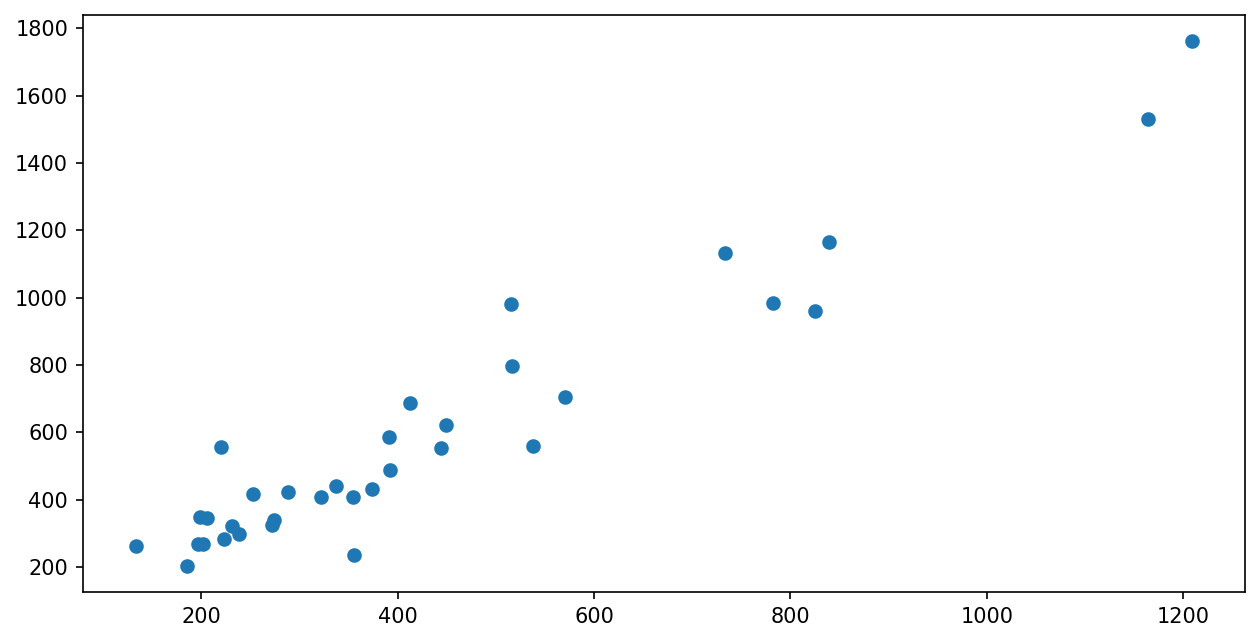

In [ ]:
plt.scatter(df['daily'], df['sunday'])

In [ ]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

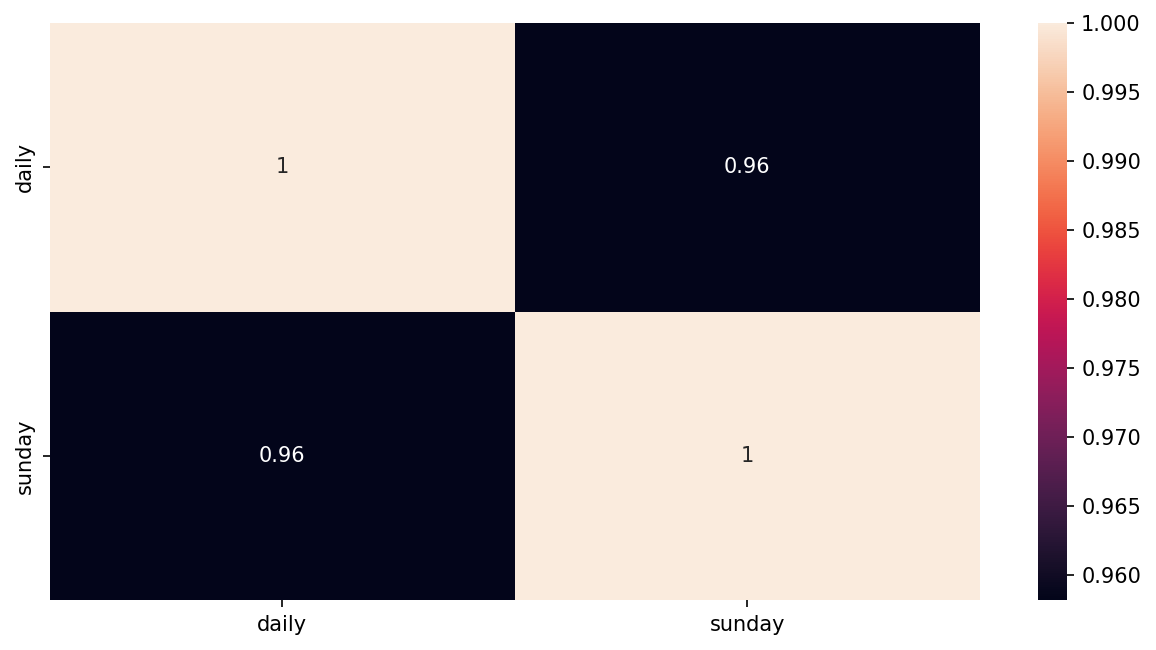

In [ ]:
sns.heatmap(df.corr(),annot=True)

fitting a linear regression model

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=df).fit()
model.params

,0
Intercept,13.835630
daily,1.339715


In [ ]:
sun=13.83+1.33*200
sun

279.83

In [ ]:
model.rsquared

0.9180596895873295

<Axes: xlabel='daily', ylabel='sunday'>

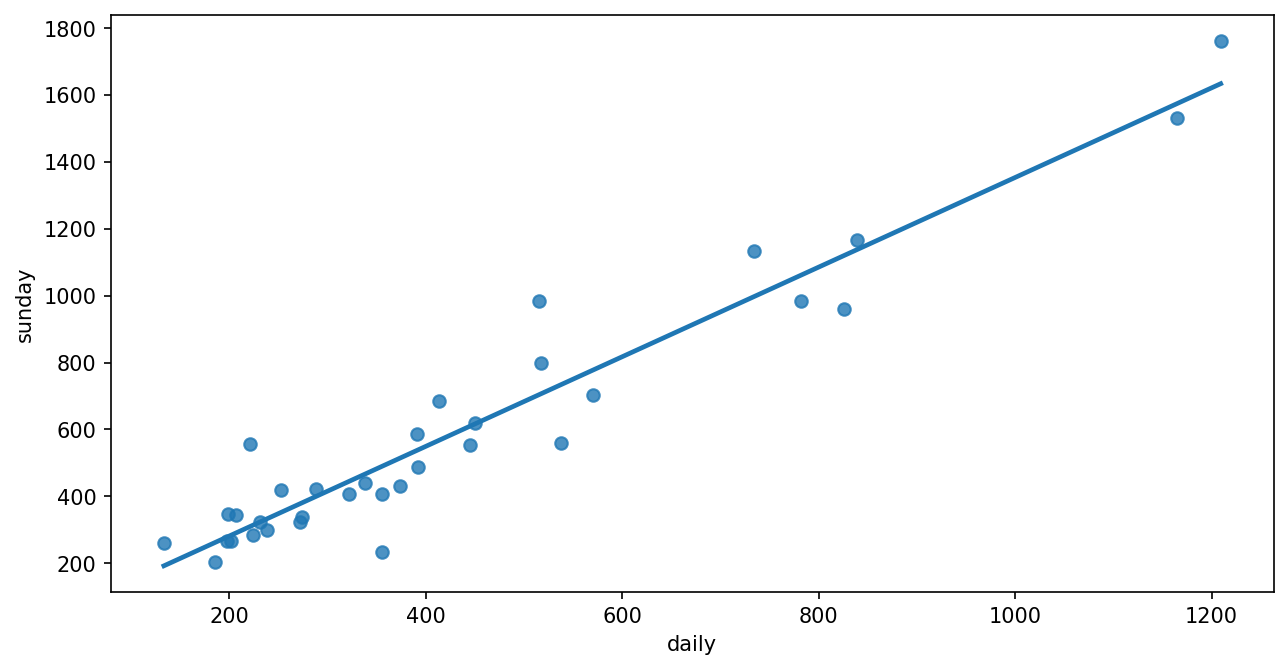

In [ ]:
sns.regplot(x='daily',y='sunday',data=df,ci=None)

In [ ]:
newdata=pd.Series([200,300])
newdata

,0
0,200
1,300


Prediction

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [ ]:
model.predict(data_pred) # model- Regression model

,0
0,281.778581
1,415.750057


Data Transformation

Log Transformation

In [ ]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [ ]:
df['log_daily']=np.log(df['daily'])
df

,daily,sunday,log_daily
0,391.952,488.506,5.971139
1,516.981,798.298,6.248006
2,355.628,235.084,5.873885
3,238.555,299.451,5.474600
4,537.780,559.093,6.287450
5,733.775,1133.249,6.598202
6,198.832,348.744,5.292460
7,252.624,417.779,5.531902
8,206.204,344.522,5.328866
9,231.177,323.084,5.443184


In [ ]:
df['log_sunday']=np.log(df['sunday'])
df

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


<Axes: xlabel='log_sunday', ylabel='Density'>

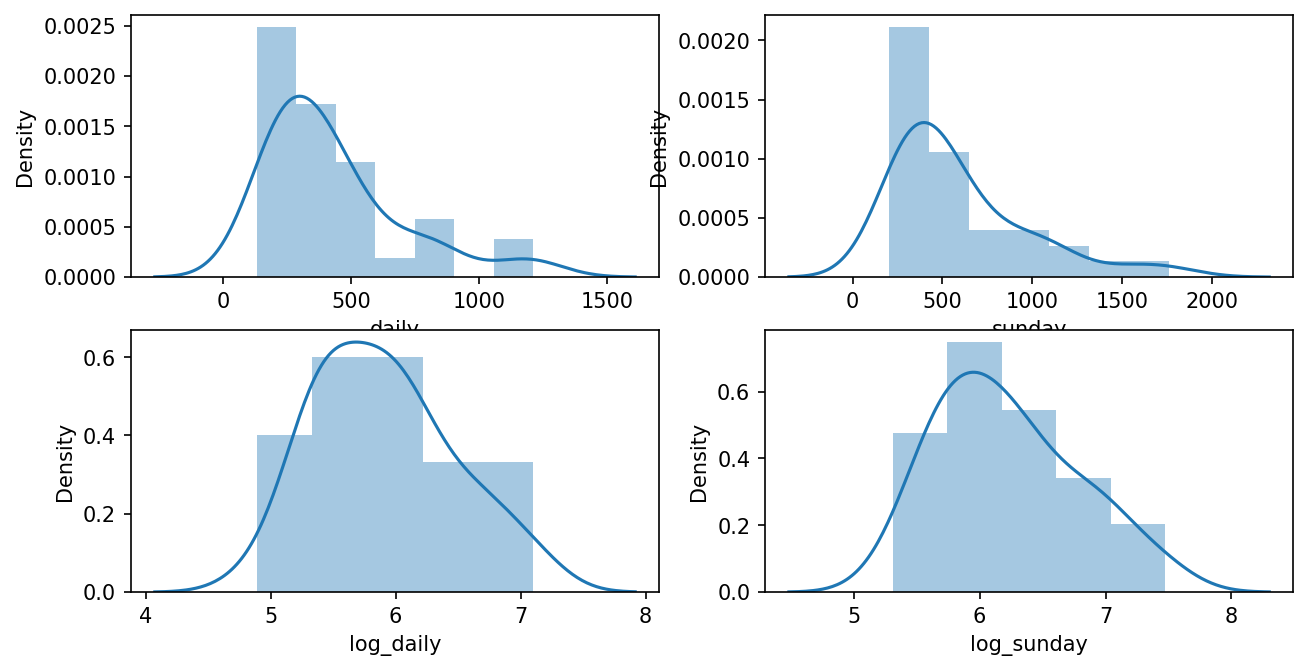

In [ ]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['log_daily'])

plt.subplot(2,2,4)
sns.distplot(df['log_sunday'])

In [ ]:
df['sqrt_daily']=np.sqrt(df['daily'])
df['sqrt_sunday']=np.sqrt(df['sunday'])
df

,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,23.190084,23.645147
5,733.775,1133.249,6.598202,7.032844,27.088282,33.663764
6,198.832,348.744,5.292460,5.854338,14.100780,18.674689
7,252.624,417.779,5.531902,6.034953,15.894150,20.439643
8,206.204,344.522,5.328866,5.842158,14.359805,18.561304
9,231.177,323.084,5.443184,5.777912,15.204506,17.974538


<Axes: xlabel='sqrt_sunday', ylabel='Density'>

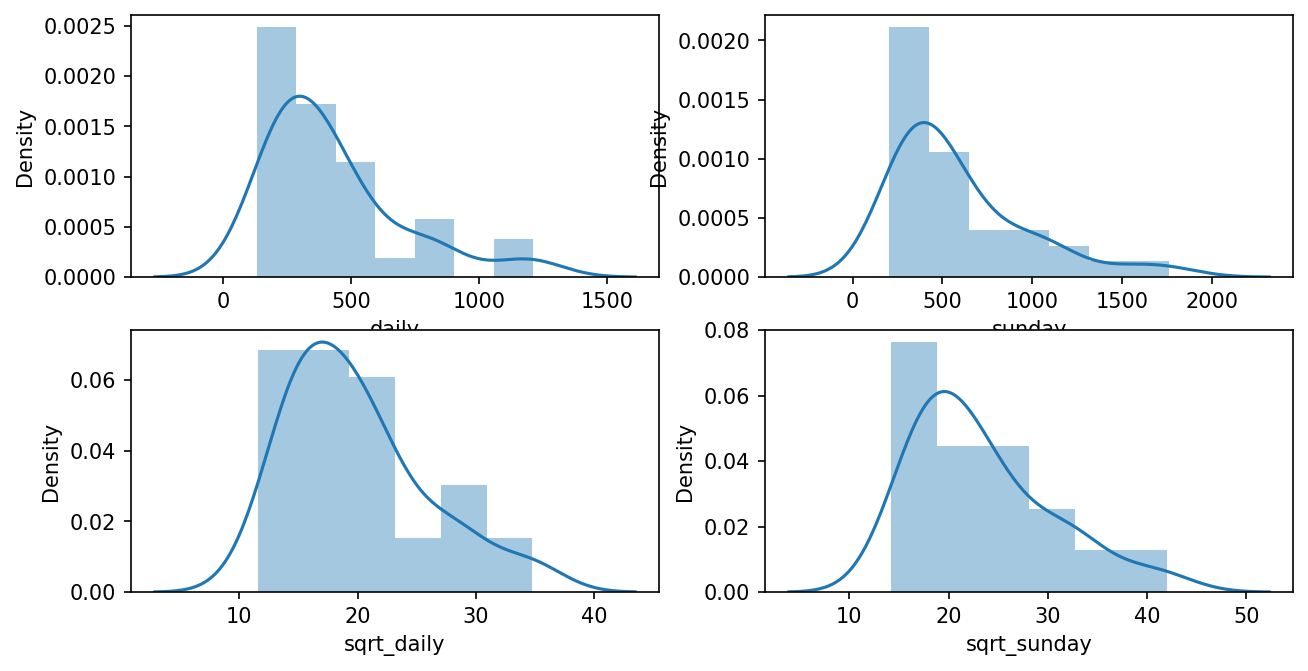

In [ ]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['sqrt_daily'])

plt.subplot(2,2,4)
sns.distplot(df['sqrt_sunday'])